Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')
  Date_reported Country_code      Country WHO_region  New_cases  \
0    03-01-2020           AF  Afghanistan       EMRO          0   
1    04-01-2020           AF  Afghanistan       EMRO          0   
2    05-01-2020           AF  Afghanistan       EMRO          0   
3    06-01-2020           AF  Afghanistan       EMRO          0   
4    07-01-2020           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0  


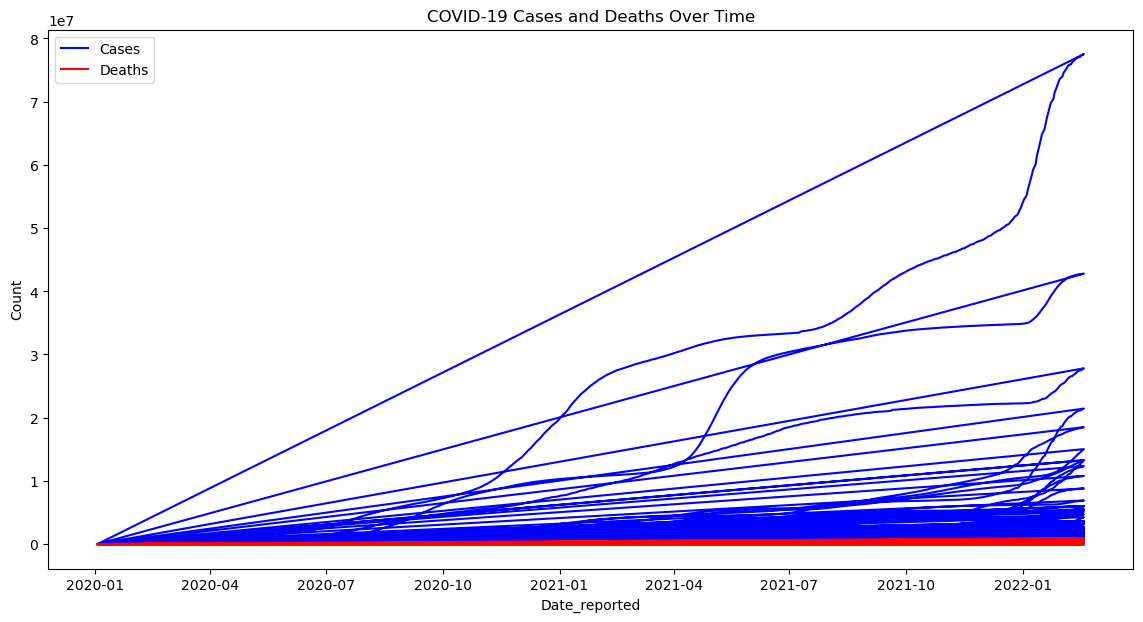

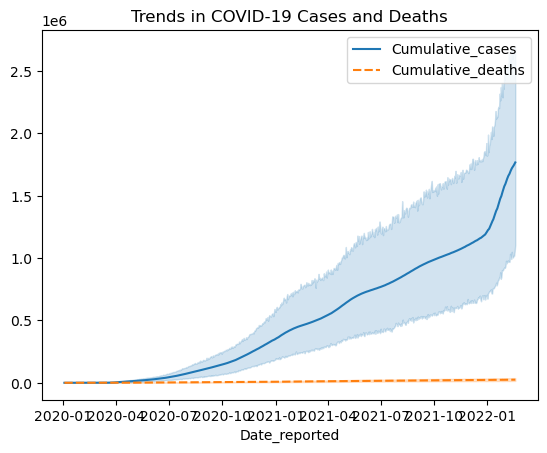

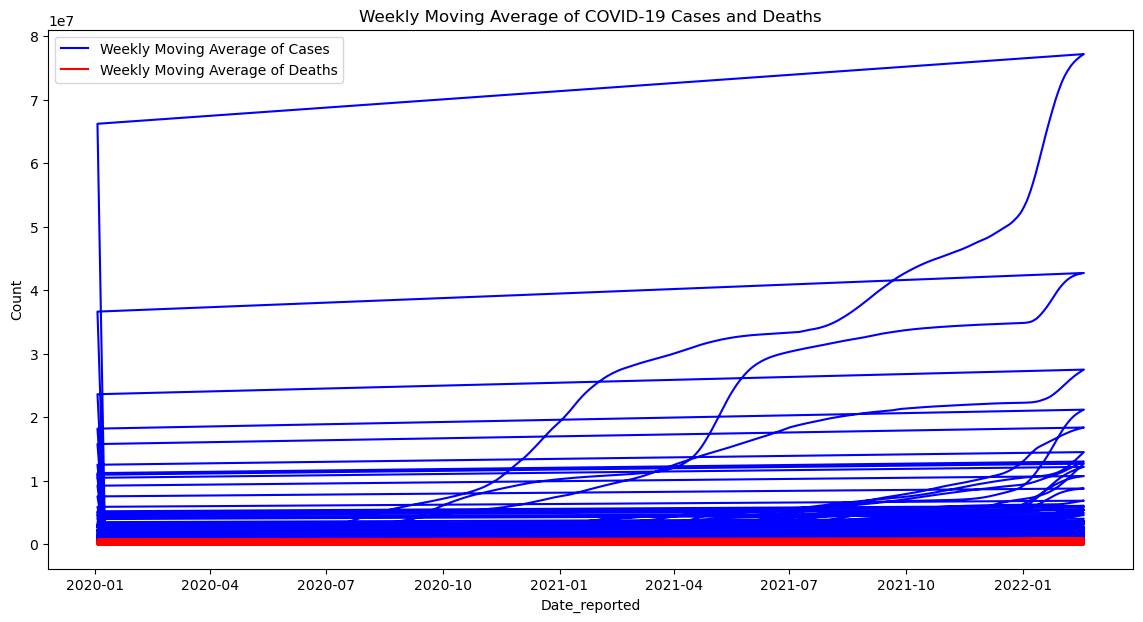

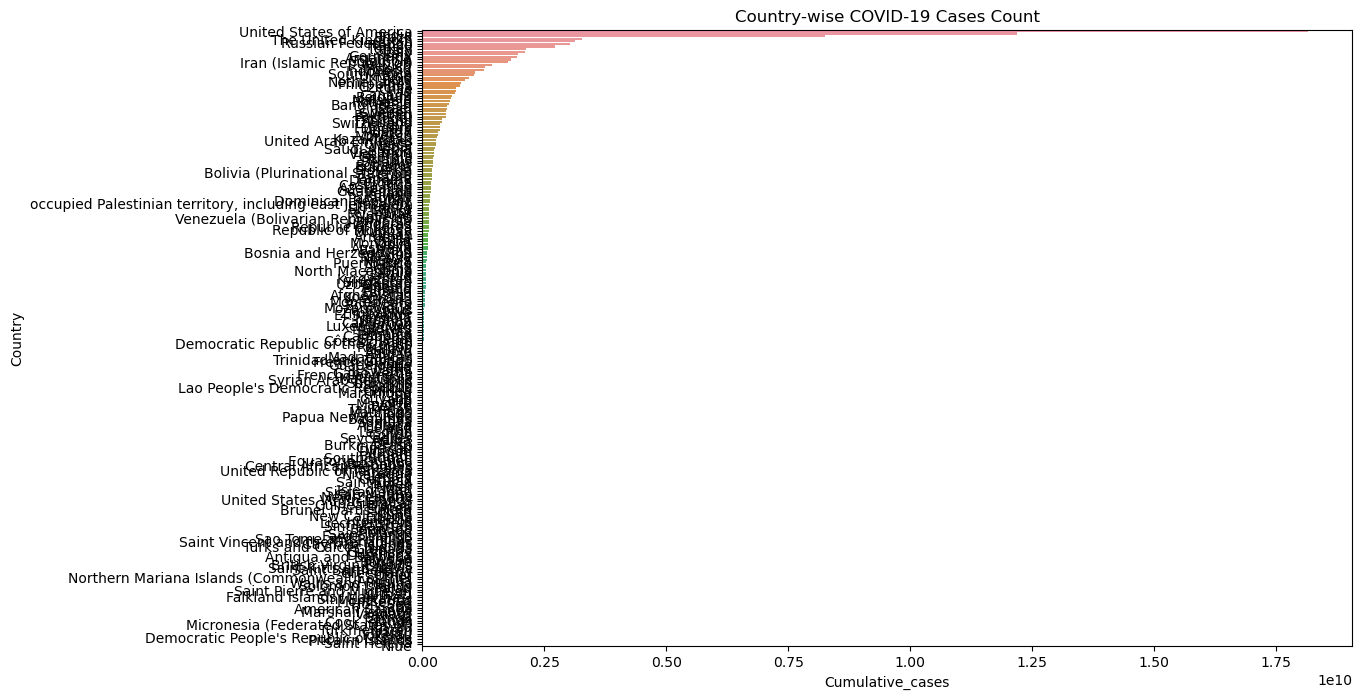

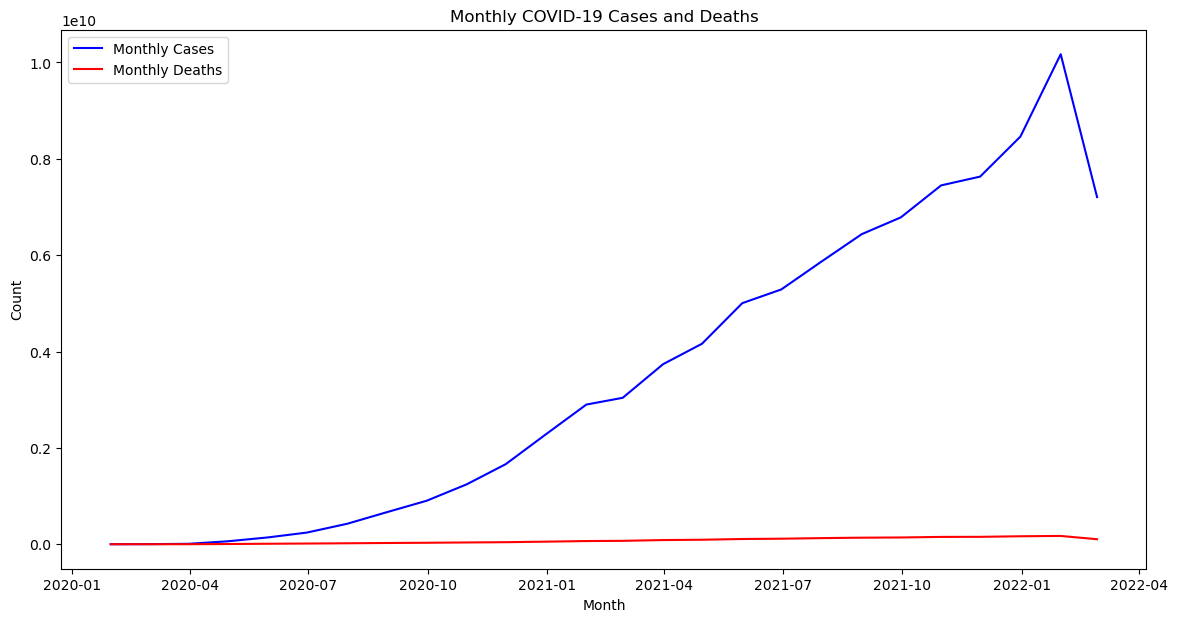

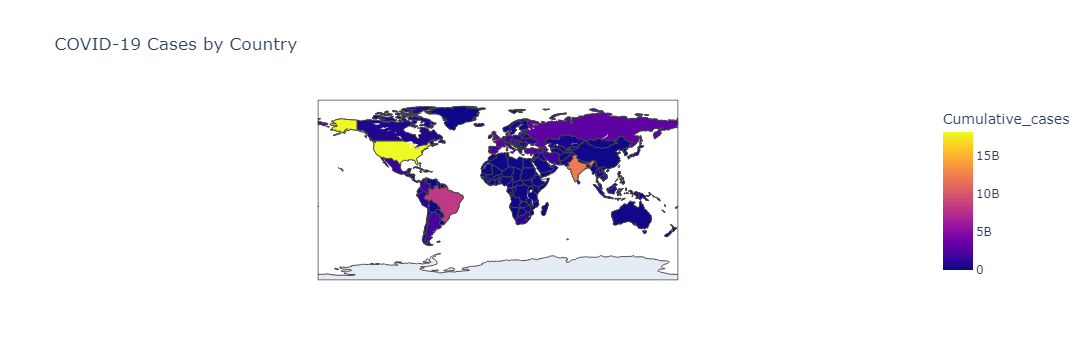

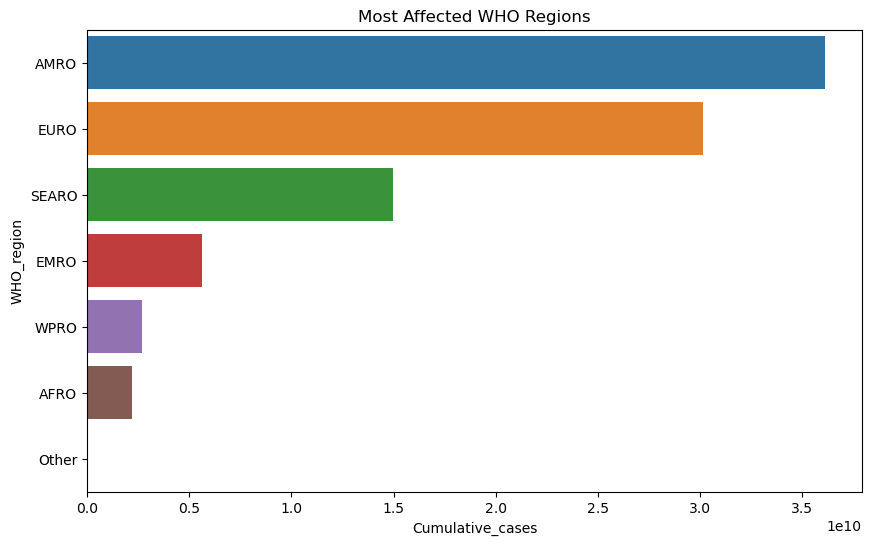

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)  

# Loaded the dataset
url = r'https://docs.google.com/spreadsheets/d/1Wg6IiTtk_EJMFiZs77JE3oH4XyxOWHDVk2XIWiNS22E/export?format=csv'
data = pd.read_csv(url)

# Check the columns and the first few rows
print(data.columns)
print(data.head())

# Convert the date column to datetime
data['Date_reported'] = pd.to_datetime(data['Date_reported'], format='%d-%m-%Y')  # Adjust format if needed
# Alternatively, you can use:
# data['Date_reported'] = pd.to_datetime(data['Date_reported'], dayfirst=True)

data.set_index('Date_reported', inplace=True)

# 1. Evolution of COVID-19 cases and deaths over time
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_cases'], label='Cases', color='blue')
plt.plot(data['Cumulative_deaths'], label='Deaths', color='red')
plt.title('COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date_reported')
plt.ylabel('Count')
plt.legend()
plt.show()

# 2. Noticeable patterns or trends
sns.lineplot(data=data[['Cumulative_cases', 'Cumulative_deaths']])
plt.title('Trends in COVID-19 Cases and Deaths')
plt.show()

# 3. Weekly moving average
data['weekly_cases'] = data['Cumulative_cases'].rolling(window=7).mean()
data['weekly_deaths'] = data['Cumulative_deaths'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['weekly_cases'], label='Weekly Moving Average of Cases', color='blue')
plt.plot(data['weekly_deaths'], label='Weekly Moving Average of Deaths', color='red')
plt.title('Weekly Moving Average of COVID-19 Cases and Deaths')
plt.xlabel('Date_reported')
plt.ylabel('Count')
plt.legend()
plt.show()

# 4. Country-wise cases count
country_cases = data.groupby('Country')['Cumulative_cases'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Cumulative_cases', y='Country', data=country_cases.sort_values('Cumulative_cases', ascending=False))
plt.title('Country-wise COVID-19 Cases Count')
plt.show()

# 5. Monthly filter 

monthly_data = data.resample('M').sum()

plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Cumulative_cases'], label='Monthly Cases', color='blue')
plt.plot(monthly_data['Cumulative_deaths'], label='Monthly Deaths', color='red')
plt.title('Monthly COVID-19 Cases and Deaths')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()

# 6. Map chart to visualize intensity of COVID-19 cases
map_data = country_cases.copy()
map_data['country'] = map_data['Country'].replace({'AF': 'Afghanistan'})  
fig = px.choropleth(map_data,
                    locations='Country',
                    locationmode='country names',
                    color='Cumulative_cases',
                    title='COVID-19 Cases by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


# 7. Hierarchy of WHO region and Country
region_country = data.groupby(['WHO_region', 'Country']).sum().reset_index()

# 8. Identify most affected WHO regions
most_affected = region_country.groupby('WHO_region')['Cumulative_cases'].sum().reset_index().sort_values(by='Cumulative_cases', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Cumulative_cases', y='WHO_region', data=most_affected)
plt.title('Most Affected WHO Regions')
plt.show()



In [54]:

# Loaded the dataset
url = 'https://docs.google.com/spreadsheets/d/1Wg6IiTtk_EJMFiZs77JE3oH4XyxOWHDVk2XIWiNS22E/export?format=csv'
df = pd.read_csv(url)

# Display the first 100 entries of interest
filtered_df = df[['Date_reported', 'WHO_region', 'Cumulative_cases', 'Cumulative_deaths']].head(100)

# Displayed the filtered DataFrame
print(filtered_df)

   Date_reported WHO_region  Cumulative_cases  Cumulative_deaths
0     03-01-2020       EMRO                 0                  0
1     04-01-2020       EMRO                 0                  0
2     05-01-2020       EMRO                 0                  0
3     06-01-2020       EMRO                 0                  0
4     07-01-2020       EMRO                 0                  0
..           ...        ...               ...                ...
95    07-04-2020       EMRO               367                 11
96    08-04-2020       EMRO               423                 14
97    09-04-2020       EMRO               444                 15
98    10-04-2020       EMRO               521                 15
99    11-04-2020       EMRO               521                 15

[100 rows x 4 columns]


In [61]:

data = {
    'Date_reported': [start('03-01-2020'),
end('11-04-2020')
],
    'WHO_region': [start_region('EMRO'),
end_region('EMRO')
],
    'Cumulative_cases': [start_case('0'),
end_case('521')],
    'Cumulative_deaths': [start_deaths('0'),
end_deaths('15')]
}

# Created DataFrame
df = pd.DataFrame(data)

# Define the start and end dates
start_date = '03-01-2020'
end_date = '11-04-2020 '

# Converted the date column to datetime
df['Date_reported'] = pd.to_datetime(df['Date_reported'], format='%d-%m-%Y')

# Define the start and end regions
start_WHO_region = 'Region1'
end_WHO_region = 'Region100'  

# Filter the DataFrame for the specific date range and region range
filtered_df = df[
    (df['Date_reported'] >= start_date) & 
    (df['Date_reported'] <= end_date) & 
    (df['WHO_region'].isin([start_WHO_region, end_WHO_region]))
]

# Display the filtered DataFrame
print(filtered_df)


NameError: name 'start' is not defined

In [43]:

data = {
    'Date_reported': ['03-01-2020',          
    '04-01-2020' ,            
    '05-01-2020',             
    '06-01-2020',            
    '07-01-2020',         
    '08-01-2020' ,           
    '09-01-2020' ,          
    '10-01-2020' ,         
    '11-01-2020' ,         
    '12-01-2020'  ],

    'WHO_region': ['Region1', 'Region2', 'Region1'],
    'Cases': [100, 200, 150],
    'Deaths': [10, 20, 15]
}
# Create DataFrame
df = pd.DataFrame(data)

# Convert the date column to datetime with the specified format
df['Date_reported'] = pd.to_datetime(df['Date_reported'], format='%d-%m-%Y')

# Convert the date column again using dayfirst=True (optional, since it's already converted)
df['Date_reported'] = pd.to_datetime(df['Date_reported'], dayfirst=True)

# Display the DataFrame
print(df)

  Date_reported
0    2020-01-03
1    2020-01-04
2    2020-01-05
3    2020-01-06
4    2020-01-07
5    2020-01-08
6    2020-01-09
7    2020-01-10
8    2020-01-11
9    2020-01-12


In [44]:
# Convert the date column to datetime format
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as needed (example: fill with 0)
df.fillna(0, inplace=True)


Date_reported    0
dtype: int64


In [47]:

# Group by date and region, then sum cases and deaths
df_grouped = df.groupby(['Date_reported', 'WHO_region']).sum().reset_index()

# Plot cumulative cases over time for different regions
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped, x='Date_reported', y='Cumulative_cases', hue='WHO_region')
plt.title('Cumulative COVID-19 Cases Over Time by Region')
plt.xlabel('Date_reported')
plt.ylabel('Cumulative Cases')
plt.show()

# Plot cumulative deaths over time for different regions
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped, x='Date_reported', y='Cumulative_deaths', hue='WHO_region')
plt.title('Cumulative COVID-19 Deaths Over Time by Region')
plt.xlabel('Date_reported')
plt.ylabel('Cumulative Deaths')
plt.show()


KeyError: 'WHO_region'

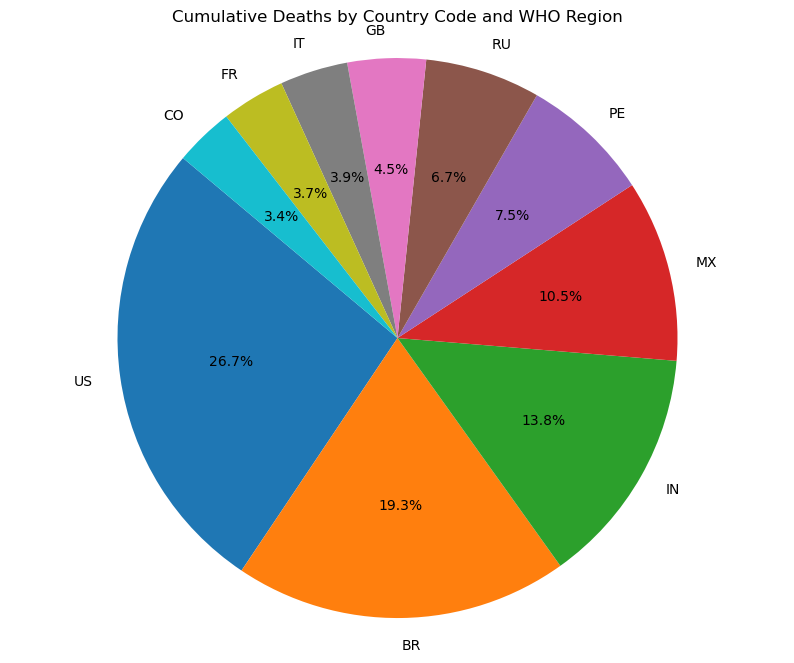

In [74]:

data = {
    'Country_code': ['US', 'BR', 'IN', 'MX', 'PE', 'RU', 'GB', 'IT', 'FR', 'CO'],
    'Cumulative_deaths': [313000000, 226000000, 162000000, 123000000, 88000000, 78000000, 53000000, 46000000, 43000000, 40000000],
}

# Create DataFrame
df = pd.DataFrame(data)

# Created pie chart
plt.figure(figsize=(10, 8))
plt.pie(df['Cumulative_deaths'], labels=df['Country_code'], autopct='%1.1f%%', startangle=140)
plt.title('Cumulative Deaths by Country Code and WHO Region')
plt.axis('equal')  

# displayed the plot
plt.show()


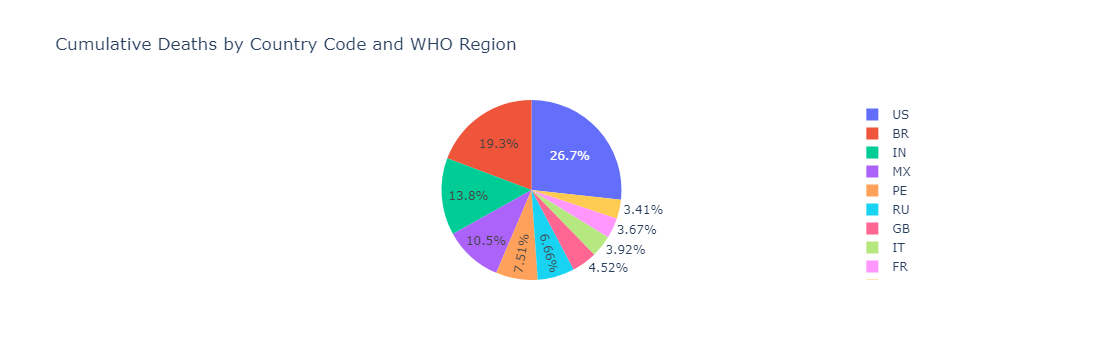

In [75]:

# Created an interactive pie chart
fig = px.pie(df, values='Cumulative_deaths', names='Country_code', title='Cumulative Deaths by Country Code and WHO Region')
fig.show()


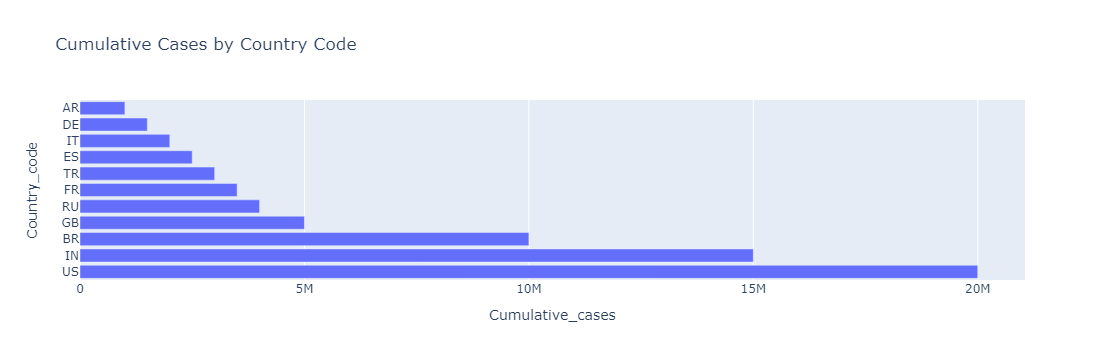

In [3]:

data = {
    'Country_code': ['US', 'IN', 'BR', 'GB', 'RU', 'FR', 'TR', 'ES', 'IT', 'DE', 'AR'],
    'Cumulative_cases': [20_000_000, 15_000_000, 10_000_000, 5_000_000, 4_000_000, 3_500_000, 3_000_000, 2_500_000, 2_000_000, 1_500_000, 1_000_000]
}

df = pd.DataFrame(data)

# Sort the DataFrame in descending order
df = df.sort_values(by='Cumulative_cases', ascending=False)


# Created an interactive horizontal bar chart
fig = px.bar(df, x='Cumulative_cases', y='Country_code', orientation='h', title='Cumulative Cases by Country Code')
fig.show()


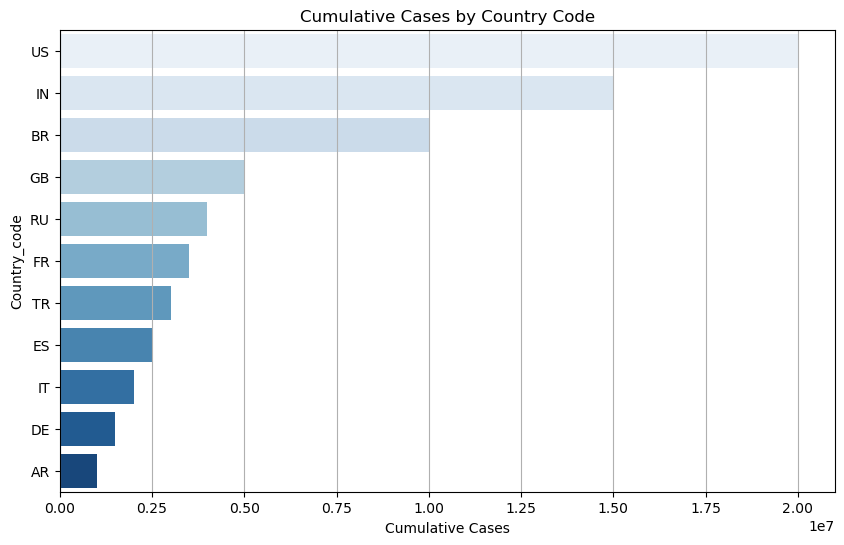

In [80]:

data = {
    'Country_code': ['US', 'IN', 'BR', 'GB', 'RU', 'FR', 'TR', 'ES', 'IT', 'DE', 'AR'],
    'Cumulative_cases': [20_000_000, 15_000_000, 10_000_000, 5_000_000, 4_000_000, 3_500_000, 3_000_000, 2_500_000, 2_000_000, 1_500_000, 1_000_000]
}

df = pd.DataFrame(data)

# Created a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Cumulative_cases', y='Country_code', data=df, palette='Blues')
plt.xlabel('Cumulative Cases')
plt.title('Cumulative Cases by Country Code')
plt.grid(axis='x')
plt.show()


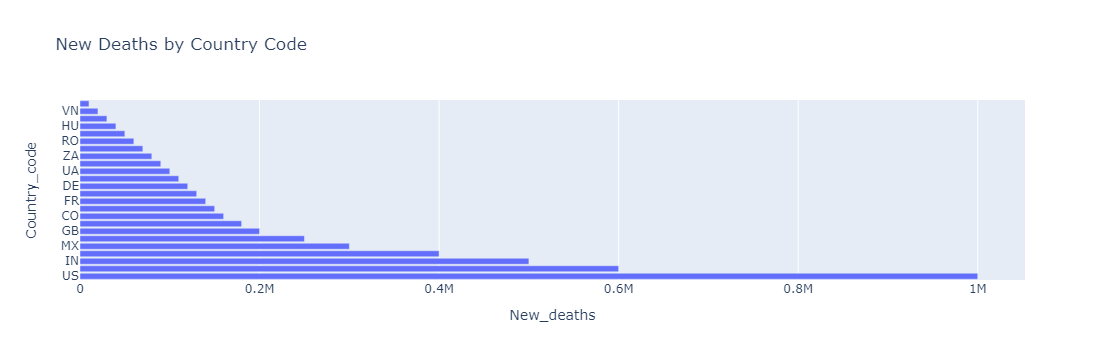

In [81]:

data = {
    'Country_code': ['US', 'BR', 'IN', 'RU', 'MX', 'PE', 'GB', 'ID', 'CO', 'IR', 'FR', 'AR', 'DE', 'PL', 'UA', 'ES', 'ZA', 'TR', 'RO', 'PH', 'HU', 'CL', 'VN', 'CZ'],
    'New_deaths': [1_000_000, 600_000, 500_000, 400_000, 300_000, 250_000, 200_000, 180_000, 160_000, 150_000, 140_000, 130_000, 120_000, 110_000, 100_000, 90_000, 80_000, 70_000, 60_000, 50_000, 40_000, 30_000, 20_000, 10_000]
}

df = pd.DataFrame(data)

# Created an interactive horizontal bar chart
fig = px.bar(df, x='New_deaths', y='Country_code', orientation='h', title='New Deaths by Country Code')
fig.show()


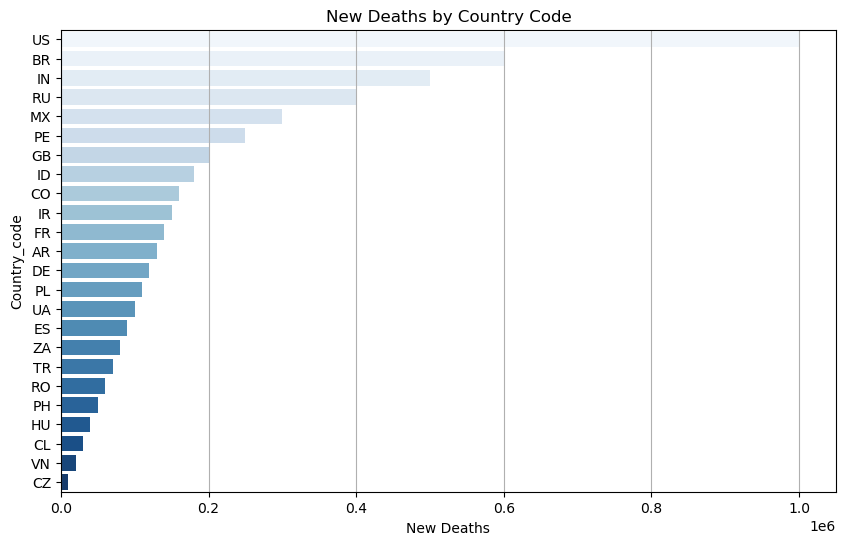

In [82]:

data = {
    'Country_code': ['US', 'BR', 'IN', 'RU', 'MX', 'PE', 'GB', 'ID', 'CO', 'IR', 'FR', 'AR', 'DE', 'PL', 'UA', 'ES', 'ZA', 'TR', 'RO', 'PH', 'HU', 'CL', 'VN', 'CZ'],
    'New_deaths': [1_000_000, 600_000, 500_000, 400_000, 300_000, 250_000, 200_000, 180_000, 160_000, 150_000, 140_000, 130_000, 120_000, 110_000, 100_000, 90_000, 80_000, 70_000, 60_000, 50_000, 40_000, 30_000, 20_000, 10_000]
}

df = pd.DataFrame(data)

# Created a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='New_deaths', y='Country_code', data=df, palette='Blues')
plt.xlabel('New Deaths')
plt.title('New Deaths by Country Code')
plt.grid(axis='x')
plt.show()


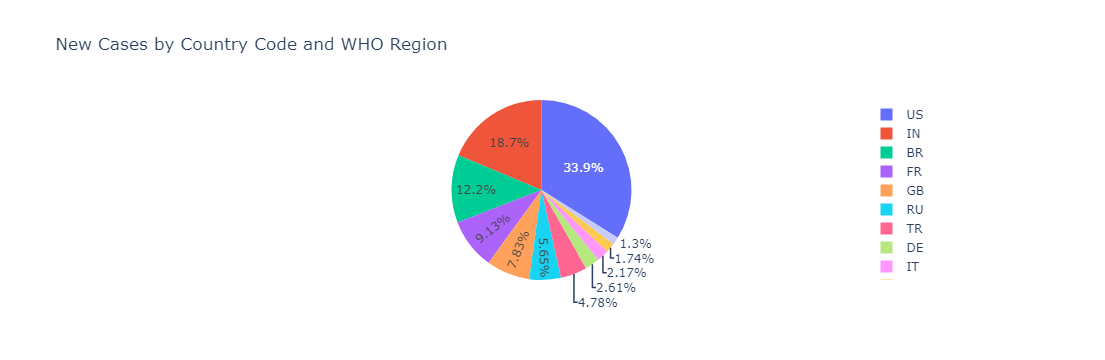

In [83]:

data = {
    'Country_code': ['US', 'IN', 'BR', 'FR', 'GB', 'RU', 'TR', 'DE', 'IT', 'ES', 'AR'],
    'New_cases': [78_000_000, 43_000_000, 28_000_000, 21_000_000, 18_000_000, 13_000_000, 11_000_000, 6_000_000, 5_000_000, 4_000_000, 3_000_000],
}

df = pd.DataFrame(data)

# Created a pie chart
fig = px.pie(df, values='New_cases', names='Country_code', title='New Cases by Country Code and WHO Region', 
             hover_data=['New_cases'], labels={'New_cases':'Number of Cases'})
fig.show()


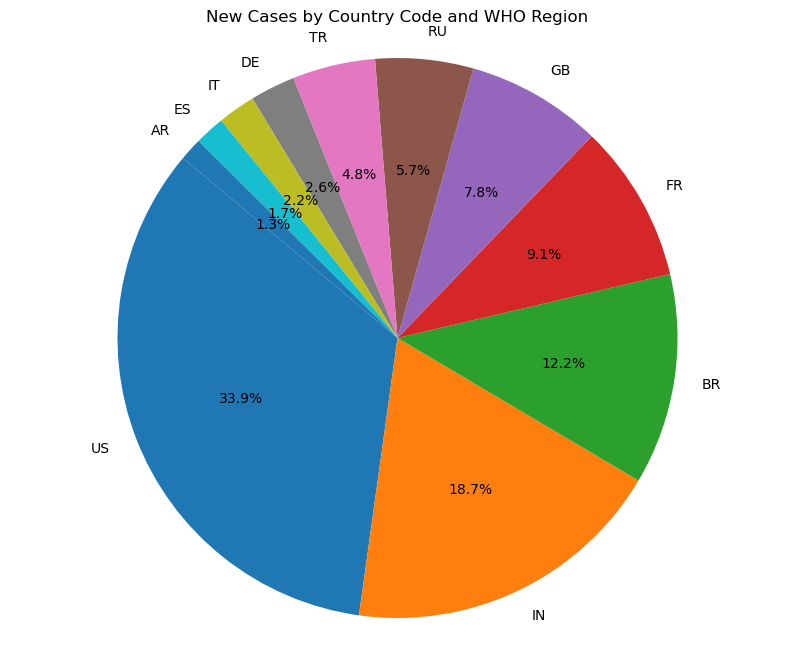

In [84]:

labels = ['US', 'IN', 'BR', 'FR', 'GB', 'RU', 'TR', 'DE', 'IT', 'ES', 'AR']
sizes = [78_000_000, 43_000_000, 28_000_000, 21_000_000, 18_000_000, 13_000_000, 11_000_000, 6_000_000, 5_000_000, 4_000_000, 3_000_000]

# Created a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('New Cases by Country Code and WHO Region')
plt.axis('equal')  # it ensures that pie is drawn as a circle.
plt.show()
